<a href="https://colab.research.google.com/github/MarcioB1999/Simula-oVari-veisAleat-rias/blob/main/Simula%C3%A7%C3%A3o_Estocastica_trab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib-venn
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import poisson
from scipy.special import gammaincinv
import math
import pandas as pd
from scipy.stats import chi2
import collections

**Estatísticas Poisson**

In [ ]:
 
def estatisticP(lamb, seed, a, b, m, n):
   v=np.zeros((10, n))
   U=np.zeros((1,10))
   for i in range(10):
      v[i, :],t=Poisson(lamb, seed[i], a, b, m, n)
      U[0,i]=int(testeD(v[i,:], lamb, n, 1))
   tabela=Estatistica(v,t)
   coluna='1 2 3 4 5 6 7 8 9 10'.split()
   linha='Teste'.split()
   tabela2=pd.DataFrame(data=U, index=linha, columns=coluna)
   return tabela, tabela2

**Estatísticas Geométrica**

In [ ]:
def estatisticG(p, seed, a, b, m, n):
   v=np.zeros((10, n))
   U=np.zeros((1,10))
   for i in range(10):
      v[i, :],t = Geometrica(p, seed[i], a, b, m, n)
      U[0,i] = int(testeD(v[i,:], p, n, 0))
   tabela2 = Estatistica(v,t)
   coluna='1 2 3 4 5 6 7 8 9 10'.split()
   linha='Teste'.split()
   tabela=pd.DataFrame(data=U, index=linha, columns=coluna)
   return tabela, tabela2

**Estatísticas Gamma**

In [ ]:
def estatisticGa(k, theta, seed, a, b, m, n):
   v=np.zeros((10, n))
   for i in range(10):
      v[i, :], t = Gamma(k, theta, seed[i], a, b, m, n)
   return Estatistica(v,t)

**Estatísticas Pareto**

In [ ]:
def estatisticPa(alpha, x_m, seed, a, b, m, n):
   v=np.zeros((10, n))
   for i in range(10):
      v[i, :], t= Pareto(alpha, x_m, seed[i], a, b, m, n)
   return Estatistica(v,t)

**Código para geração Uniforme**

In [ ]:
def Uniforme(seed, a, b, m, n):
    U=[]
    aux=(a*seed+b)%m
    U.append(aux/m)
    for i in range(1, n):
        aux=(a*aux+b)%m
        U.append(aux/m)
    return U

**Código para geração Geométrica**

In [ ]:
def Geometrica(p, seed, a, b, m, n):
    G = []
    U = Uniforme(seed, a, b, m, n)
    c = math.log(1-p)
    print(c)
    for i in range(n):
       G.append(int((math.log(U[i]))/c)+1)
    T = st.geom(p = p)
    return G, T

**Código para geração Poisson**

In [ ]:
def Poisson(lamb, seed, a, b, m, n):
    P=[]
    e=np.exp(1)
    U=Uniforme(seed, a, b, m, n)
    p=e**(-lamb)
    F=p
    for i in range(n):
       p=e**(-lamb)
       F=p
       j=0
       while(F<=1):
           if(U[i]<F):
             P.append(j)
             break
           p=lamb*p/(j+1)
           F=F+p
           j=j+1
    T = st.poisson(mu = lamb)
    return P, T

**Código para Geração da Gamma**

In [ ]:
def Gamma(k, theta, seed, a, b, m, n): #Precisa de Correção
    G = []
    U = Uniforme(seed, a, b, m, n)
    U2 = Uniforme(seed+2, a, b, m, n)
    c = math.pow(k,k) / (math.gamma(k) * math.exp(k-1))
    for i in range(n): # len(G) < n:
      Y = -k * math.log(U[i])
      aux = st.gamma.pdf(Y,a = k) / (c * st.expon.pdf(Y,1/k))
      if U2[i] < aux:
        x = theta * Y
      #x = ((math.pow(U[i],-(k-1)) * math.exp(-U[i]/theta)) / (math.gamma(k) * math.pow(theta,k)))
        G.append(x)
      else:
        G.append(G[i-1])
    T = st.gamma(a = k,scale = theta)
    return G, T

**Código para Geração do Pareto**

In [ ]:
def Pareto(alpha, x_m, seed, a, b, m, n):
    P = []
    U = Uniforme(seed, a, b, m, n)
    for i in range(n):
      x = (x_m / math.pow((1-U[i]),(1/alpha)))
      P.append(x)
    T = st.pareto(b = alpha, scale = x_m)
    return P,T

**Estatísticas**

In [ ]:
def Estatistica(v,t):
    E=np.zeros((8, 12))
    for i in range(10):
       E[0, i] = np.mean(v[i, :]) # Média
       E[1, i] = np.var(v[i, :]) # Variância
       E[2, i] = np.median(v[i, :]) # Mediana
       #E[3, i] = st.mode(v[i, :]) # Valor Modal
       E[4, i] = st.kurtosis(v[i, :]) # Curtose
       E[5, i] = st.skew(v[i, :]) # Assimetria
       E[6, i] = st.scoreatpercentile(v[i, :], 25) # 1º Quartil
       E[7, i] = st.scoreatpercentile(v[i, :], 75) # 3º Quartil
    for j in range(8):
       E[j, 10] = math.fsum(E[j, :])/10 #Média das 
    E[0, 11] = t.mean() # Média
    E[1, 11] = t.var() # Variância
    E[2, 11] = t.median() # Mediana
    #E[3, 11] = st.mode(t,axis=None) # Valor Modal
    E[4, 11] = t.stats(moments = 'k') # Curtose
    E[5, 11] = t.stats(moments = 's') # Assimetria
    E[6, 11] = t.ppf(q = .25) # 1º Quartil
    E[7, 11] = t.ppf(q = .75) # 3º Quartil
    coluna='1 2 3 4 5 6 7 8 9 10 Média Teoria'.split()
    linha='Media Variancia Mediana Moda Curtose Assimetria 1_Quartil 3_Quartil'.split()
    tabela=pd.DataFrame(data=E, index=linha, columns=coluna)
    tabela.to_excel("estatiscas.xls")
    return tabela

**Gráficos**

**Grafico Pareto**

In [ ]:
def graficoP(X, alpha, x_m, j):
   fig, ax = plt.subplots()
   n, bins, ah = ax.hist(X,label="histograma")
   y = j * ((alpha/x_m) * ((x_m/bins) ** (alpha+1)))
   ax.plot(bins,y,label="densidade")
   plt.ylim(0, 1000)
   plt.xlim(0,3.5)
   plt.xlabel("Dados")
   plt.legend(loc="upper right")
   plt.title("contínua")

**Gráfico das Discretas**

In [ ]:
def graficoD(a):
    plt.hist(a, np.max(a))
    plt.savefig('figura1.pdf',format='pdf',bbox_inches='tight')
    plt.show()

**Gráfico Gamma**


In [ ]:
def GraficoG(X, k, theta, j):
  fig, ax = plt.subplots()
  n, bins, ah = ax.hist(X,100,label="Histograma")
  y=[]
  for i in bins:
      y.append(j * (((math.pow(i,k-1)) * (math.exp(-i/theta) * math.pow(theta,-k) )/ math.gamma(k))))
  ax.plot(bins,y,label="Densidade")
  plt.ylim(0, 1000)
  #plt.xlim(0, 1000)
  plt.xlabel("Dados")
  plt.legend(loc="upper right")
  plt.title("Contínua")

**Testes de Aderencia**

In [ ]:
def testeD(x, p, n, distri, nv=0.05):
    qui=0
    x=sorted(x)
    counter=collections.Counter(x)
    aux=list(counter.keys())
    if distri==1:
       prob = st.poisson.pmf(aux,p)*n
    else:
       prob = st.geom.pmf(aux, p)*n
    j=0
    for i in aux:
        qui+=(((counter[i]-prob[j])**(2))/prob[j])
        j+=1
    if(qui<=chi2.ppf(1-nv, np.shape(aux)[0])):
      return 1
    else:
      return 0

In [ ]:
def aderenciaCont(X, T):
  E = np.zeros((10,3))
  for i in range(1,10):
    #x = iqr(X, rng = (0, 10*i)) # 10*i% dos Dados
    x = st.scoreatpercentile(X, 10*i) # Faixa de 10*i% dos Dados
    E[i][0] = x
    #x = iqr(T, rng = (0, 10*i)) # 10*i% dos Dados
    t = T.ppf(q = (10*i/100)) #- T.ppf(q = ((10*i-10)/100)) # Faixa 10*i% dos Dados
    E[i][1] = t
    E[i][2] = math.pow((E[i][0]-E[i][1]),2)/10
  coluna='Simulado Teoria EQM'.split()
  linha='00%|--10% 10%|--20% 20%|--30% 30%|--40% 40%|--50% 50%|--60% 60%|--70% 70%|--80% 80%|--90% 90%|--100%'.split()
  tabela=pd.DataFrame(data=E, index=linha, columns=coluna)
  return tabela


**Introdução:**

**Main**

Escolha a distribuicao que deseja simular: 

P: Poisson 

g: Geometrica 

pa: Pareto 

ga: Gamma 

pa
Distribuição Pareto
                    1          2          3  ...         10      Média     Teoria
Media        1.232140   1.250224   1.248451  ...   1.240963   1.244303   1.250000
Variancia    0.076699   0.105198   0.089792  ...   0.082664   0.088783   0.104167
Mediana      1.139830   1.154380   1.155015  ...   1.147413   1.149970   1.148698
Moda         0.000000   0.000000   0.000000  ...   0.000000   0.000000   0.000000
Curtose     11.988793  21.909690  19.548191  ...  14.088689  16.103447  70.800000
Assimetria   2.815450   3.762999   3.369838  ...   2.934934   3.161594   4.647580
1_Quartil    1.056501   1.063150   1.056198  ...   1.056492   1.058928   1.059224
3_Quartil    1.304808   1.311688   1.324936  ...   1.310930   1.316145   1.319508

[8 rows x 12 columns]
            Simulado    Teoria           EQM
00%|--10%   0.000000  0.000000  0.000000e+00
10%|--20%   1.017683  1.021

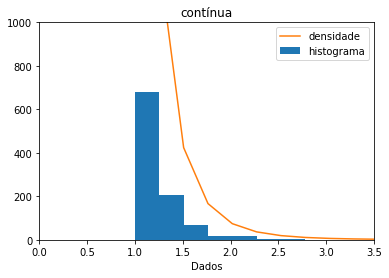

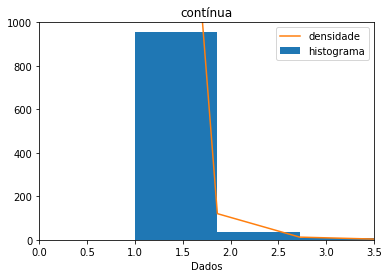

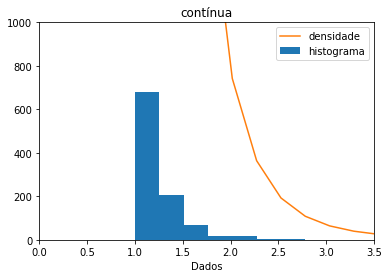

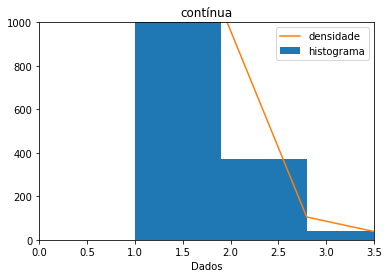

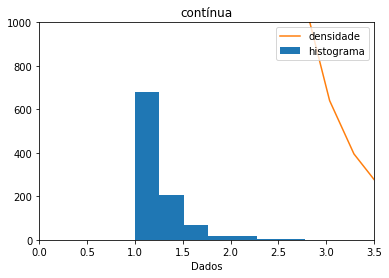

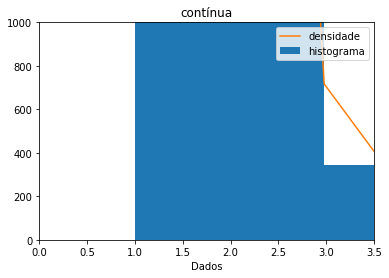

In [ ]:
a=16807
b=0
m=2147483648
s=[42, 5, 3, 250, 42, 321, 1345, 50, 120, 61]
n=1000
print("Escolha a distribuicao que deseja simular: \n")
print("P: Poisson \n")
print("g: Geometrica \n")
print("pa: Pareto \n")
print("ga: Gamma \n")
 
qui = input()
if qui == 'p': 
  print("Distribuição Poisson")
  x,t = Poisson(100, s[0], a,b,m,n)
  for i in range(1,4):
    n = 10 ** (i+2)
    text = "Poisson_Estatistica_" + str(n) + ".xlsx"
    text1 = "Poisson_Aderencia_" + str(n) + ".xlsx"
    est, ade = estatisticP(100,s,a,b,m,n)
    print(est)
    print(ade)
    graficoD(x)
    graficoD(t.rvs(n))
    est.to_excel(text)
    ade.to_excel(text1)
if qui == 'G': 
  print("Distribuição Geometrica")
  x,t=Geometrica(0.3, s[0], a,b,m,n)
  for i in range(1,4):
    n = 10 ** (i+2)
    text = "Geometrica_Estatistica_" + str(n) + ".xlsx"
    text1 = "Geometrica_Aderencia_" + str(n) + ".xlsx"
    ade, est = estatisticG(0.3,s,a,b,m,n)
    print(est)
    print(ade)
    graficoD(x)
    graficoD(t.rvs(n))
    est.to_excel(text)
    ade.to_excel(text1)
if qui == 'Ga': 
  print("Distribuição Gamma")
  x,t = Gamma(5, 1, s[0], a, b, m, n)
  for i in range(1,4):
    n = 10 ** (i+2)
    text = "Gamma_Estatistica_" + str(n) + ".xlsx"
    text1 = "Gamma_Aderencia_" + str(n) + ".xlsx"
    est = estatisticGa(5, 1, s, a, b, m, n)
    ade = aderenciaCont(x,t)
    print(estatisticGa(5, 1, s, a, b, m, n))
    print(aderenciaCont(x,t))
    est.to_excel(text)
    ade.to_excel(text1)
  #graficoD(x)
  #graficoD(t.rvs(n))
if qui == 'pa': 
  print("Distribuição Pareto")
  x,t=Pareto(5, 1, s[0], a, b, m, n)
  for i in range(1,4):
    n = 10 ** (i+2)
    text = "Pareto_Estatistica_" + str(n) + ".xlsx"
    text1 = "Pareto_Aderencia_" + str(n) + ".xlsx"
    est = estatisticPa(5, 1, s, a, b, m, n)
    ade = aderenciaCont(x,t)
    print(est)
    print(ade)
    graficoP(x, 5, 1, n)
    graficoP(t.rvs(n), 5, 1, n)
    est.to_excel(text)
    ade.to_excel(text1)